<a href="https://colab.research.google.com/github/ianara01/Park-Sangjin/blob/master/simulationplant2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

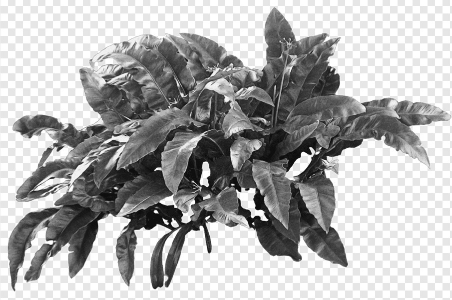

<BarContainer object of 256 artists>

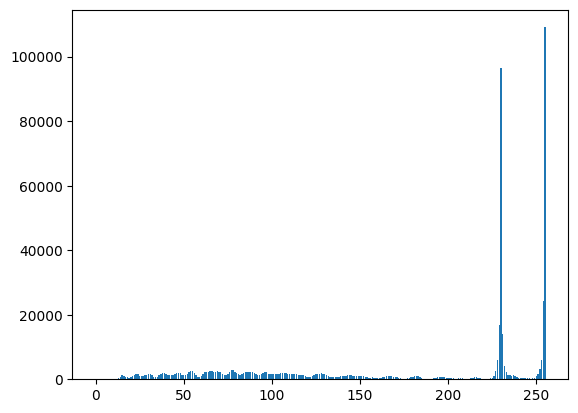

In [17]:
'''
원하는 이미지를 이용하여 회색조 이미지를 생성한다.
생성된 이미지의 히스토그램을 생성한다.
'''

inputColorImg = cv2.imread('sample_data/plant1.jpg')
height, width, _ = inputColorImg.shape
inputGrayImg = cv2.cvtColor(inputColorImg, cv2.COLOR_BGR2GRAY)

cv2_imshow(cv2.resize(inputGrayImg, (width//2, height//2)))

histogram = np.zeros((256))
for j in range(height):
  for i in range(width):
    grayPixel = int(inputGrayImg[j, i])
    histogram[grayPixel] += 1

import matplotlib.pyplot as plt
plt.bar(range(len(histogram)), histogram)

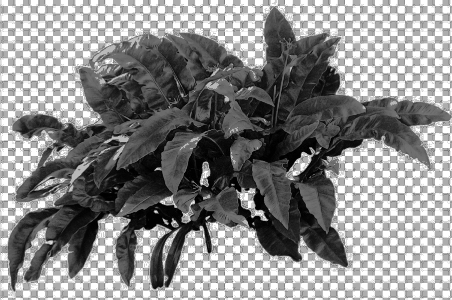

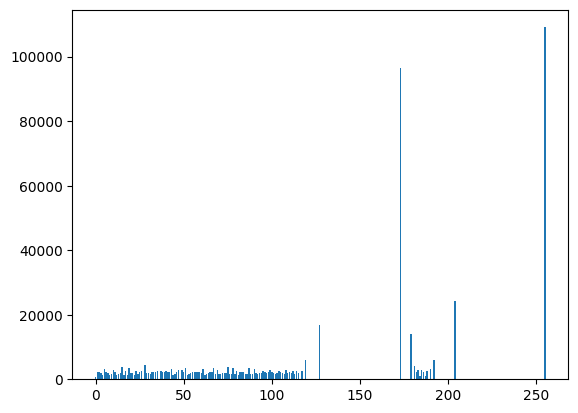

In [18]:
'''
생성된 히스토그램을 평활화한다.
'''
clin = 0
equalizedHist = np.zeros((256))
histMatch = np.zeros((256))
for i in range(len(histogram)):
  clin += (histogram[i]/(height*width))
  equalizedHist[round(clin * 255)] += histogram[i]
  histMatch[i] = round(clin * 255)

import matplotlib.pyplot as plt
plt.bar(range(len(equalizedHist)), equalizedHist)

equalizedImg = np.zeros((height,width),dtype=np.uint8)
for j in range(height):
  for i in range(width):
    equalizedImg[j, i] = histMatch[int(inputGrayImg[j, i])]
cv2_imshow(cv2.resize(equalizedImg, (width//2, height//2)))

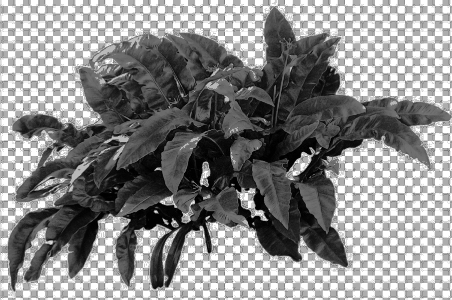

<BarContainer object of 256 artists>

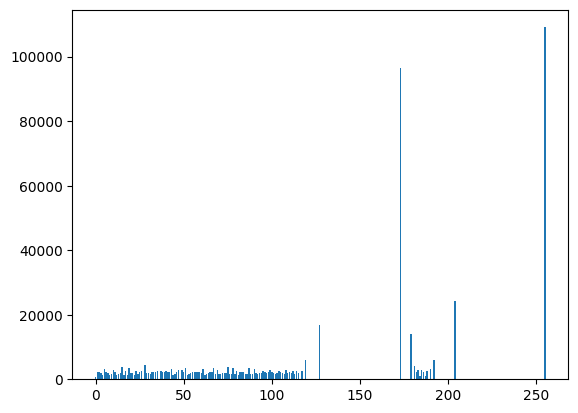

In [19]:
dst = cv2.equalizeHist(inputGrayImg)
hist = cv2.calcHist([dst], [0], None, [256],[0,256])
cv2_imshow(cv2.resize(dst, (width//2, height//2)))
plt.bar(range(len(hist.reshape(256))), hist.reshape(256))

threshold: 100.0
threshold: 159.0
threshold: 127.0


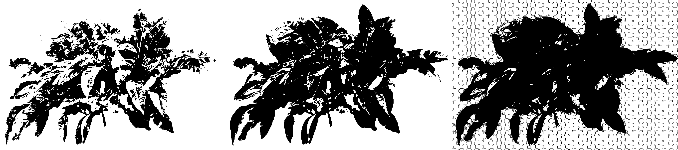

In [20]:
#회색조 이미지에 대하여 이진화를 수행
# 본인이 설정한 임의의 숫자(여기서는 100)를 기반으로
# 100 이상인 픽셀의 경우 흰색으로
# 100 이하인 픽셀의 경우 검정색으로 변환한다.
ret, dst = cv2.threshold(inputGrayImg, 100, 255, cv2.THRESH_BINARY)
print('threshold:', ret)

#Otsu 로 자동으로 threshold 값 파악 (비교용)
ret2, dst2 = cv2.threshold(inputGrayImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold:', ret2)

ret3, dst3 = cv2.threshold(equalizedImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold:', ret3)
cv2_imshow(np.hstack((cv2.resize(dst,(width//4, height//4)), cv2.resize(dst2,(width//4, height//4)), cv2.resize(dst3,(width//4, height//4)))))

Original png image


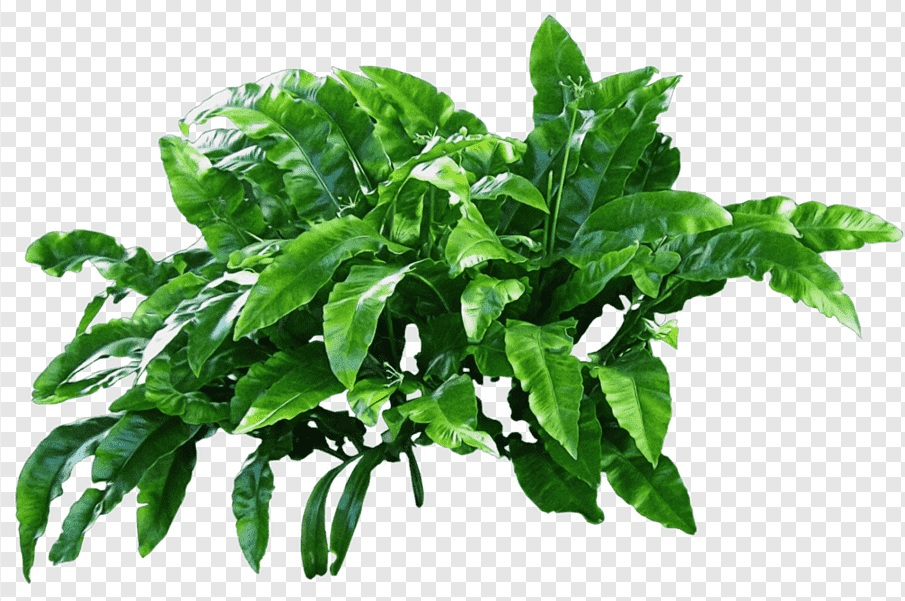

height:601, width:905, channel:3

Corp image


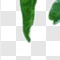


Corp image elements


IndexError: ignored

In [26]:
'''
이진 이미지 불러오기
Morphology
'''
#Set printing options of numpy.
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Read including the alpha channel.
# What is alpha channel: https://www.vectornator.io/blog/alpha-channel/
# pngImg=cv2.imread('sample_data/plant1.jpg', cv2.IMREAD_UNCHANGED)
new_img = cv2.imread('sample_data/plant1.jpg')
inputGrayImg = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
ret3, dst3 = cv2.threshold(inputGrayImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('Original png image')
cv2_imshow(pngImg)

h, w, c = pngImg.shape
print('height:{}, width:{}, channel:{}'.format(h, w, c))

cropExample = pngImg[h - h//10:h, 0:h//10]
print()
print('Corp image')
cv2_imshow(cropExample)

print()
print('Corp image elements')
print(cropExample[:,:,3])

t,binImg=cv2.threshold(pngImg[:,:,3],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print()
print('Binary image result')
cv2_imshow(binImg)

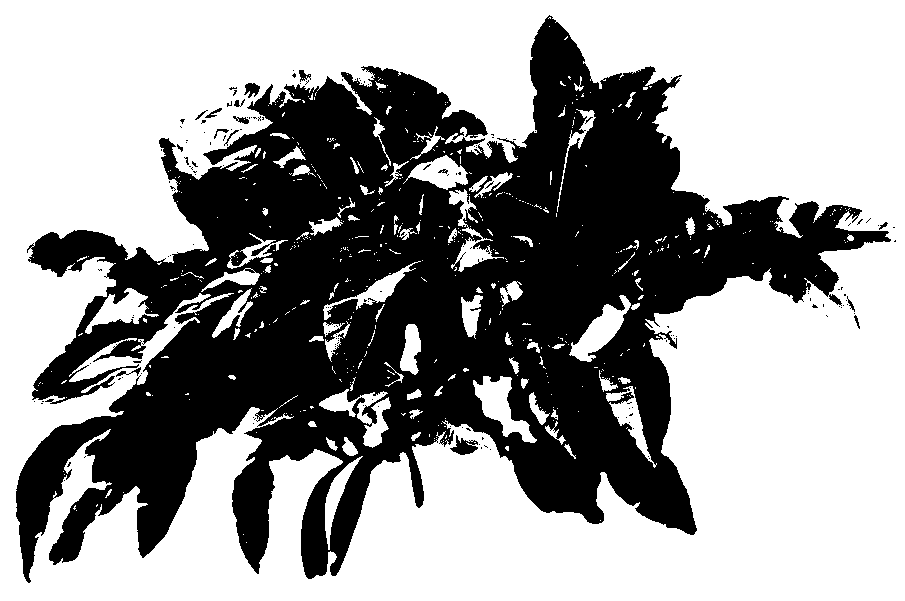


팽창 연산 결과


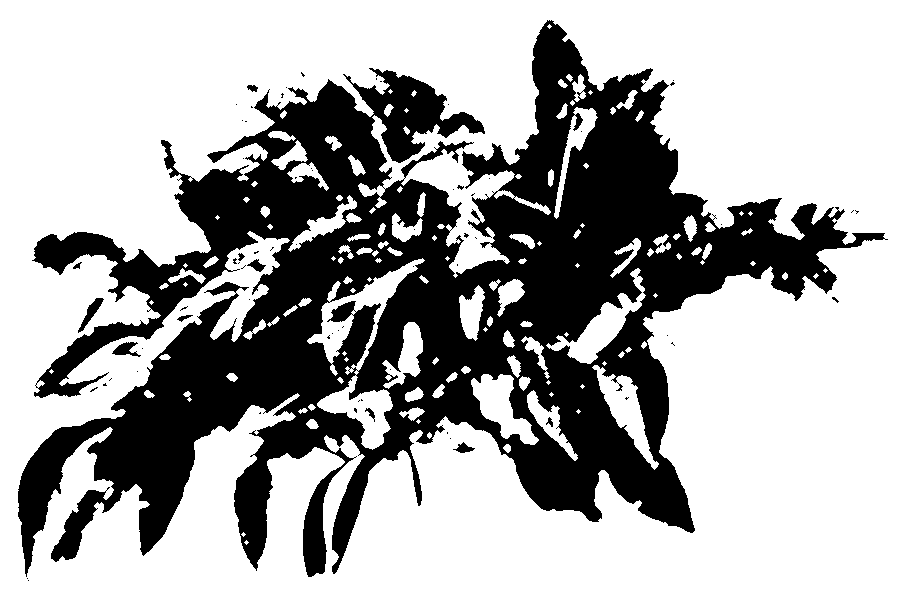


침식 연산 결과


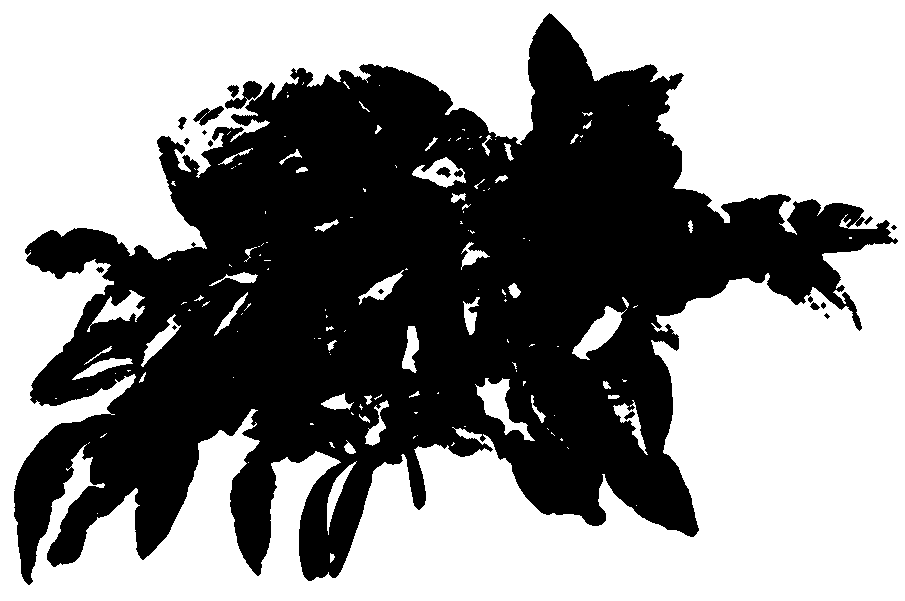


닫기 연산 결과 = 팽창 + 침식


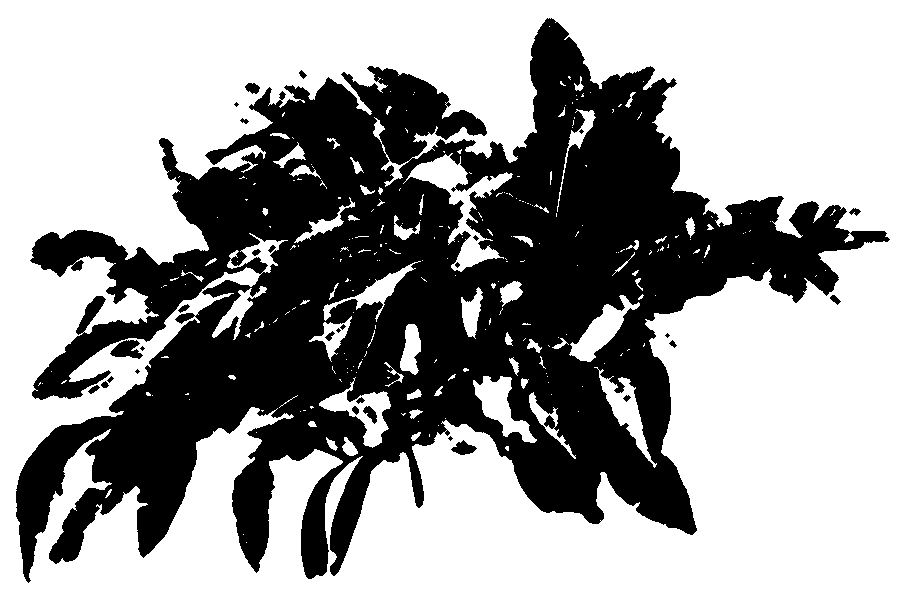


열기 연산 결과 = 침식 + 팽창


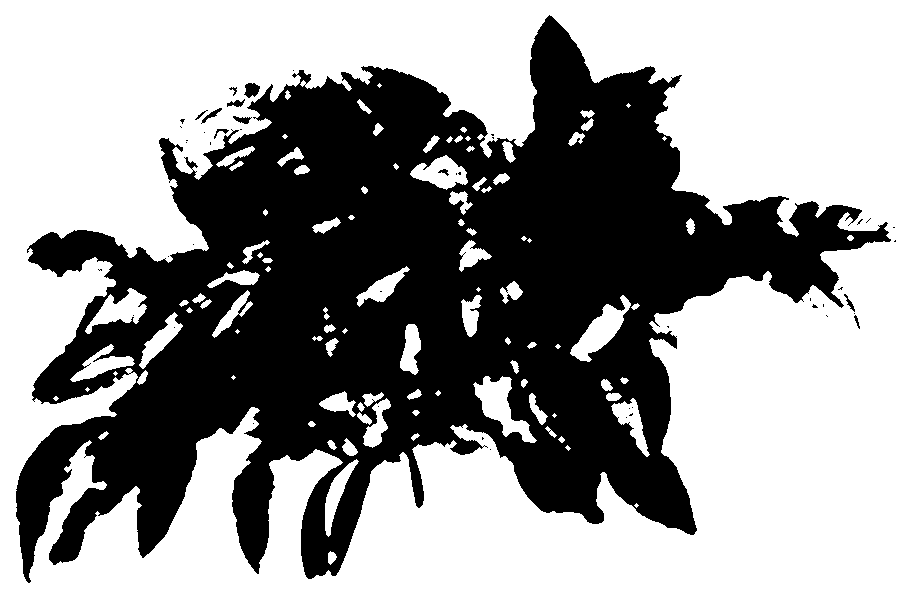

In [25]:

new_img = cv2.imread('sample_data/plant1.jpg')
inputGrayImg = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
ret3, dst3 = cv2.threshold(inputGrayImg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2_imshow(dst3)

kernel=np.uint8([[0,0,1,0,0],			# 구조 요소
                [0,1,1,1,0],
                [1,1,1,1,1],
                [0,1,1,1,0],
                [0,0,1,0,0]])

print()
print('팽창 연산 결과')
b_dilation=cv2.dilate(dst3,kernel,iterations=1)	# 팽창
cv2_imshow(b_dilation)

print()
print('침식 연산 결과')
b_erosion=cv2.erode(dst3,kernel,iterations=1)	# 침식
cv2_imshow(b_erosion)

print()
print('닫기 연산 결과 = 팽창 + 침식')
b_closing=cv2.erode(cv2.dilate(dst3,kernel,iterations=1),kernel,iterations=1)	# 닫기
cv2_imshow(b_closing)

print()
print('열기 연산 결과 = 침식 + 팽창')
b_closing=cv2.dilate(cv2.erode(dst3,kernel,iterations=1),kernel,iterations=1)	# 열기
cv2_imshow(b_closing)

원본 이미지


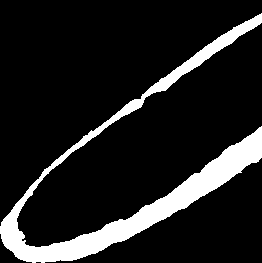


팽창 연산 결과


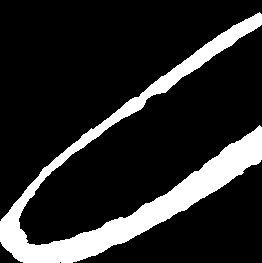


침식 연산 결과


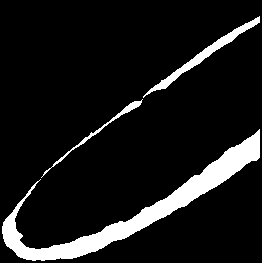

In [23]:
'''
사용자 정의 모폴로지 적용
구조요소 적용
'''
cropBinImg=binImg[binImg.shape[0]//2:binImg.shape[0],0:binImg.shape[0]//2]

print('원본 이미지')
cv2_imshow(cropBinImg)

kernel=np.uint8([[0,0,1,0,0],			# 구조 요소
                [0,1,1,1,0],
                [1,1,1,1,1],
                [0,1,1,1,0],
                [0,0,1,0,0]])

height, width = cropBinImg.shape
dilateImg = np.zeros((height,width))
for j in range(2,height-2):
  for i in range(2,width-2):
    if cropBinImg[j,i]:
      for kj in range(-2,3,1):
        for ki in range(-2,3,1):
          if kernel[kj+2, ki+2]:
            dilateImg[kj+j, ki+i] = 255

print()
print('팽창 연산 결과')
cv2_imshow(dilateImg)

height, width = cropBinImg.shape
erodeImg = np.zeros((height,width))
for j in range(2,height-2):
  for i in range(2,width-2):
    if cropBinImg[j,i]:
      cnt = 0
      for kj in range(-2,3,1):
        for ki in range(-2,3,1):
          if kernel[kj+2, ki+2] and cropBinImg[kj+j, ki+i]: cnt += 1
          if cnt == 13: erodeImg[j, i] = 255

print()
print('침식 연산 결과')
cv2_imshow(erodeImg)

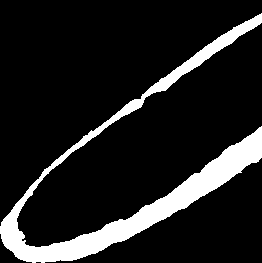


팽창 연산 결과


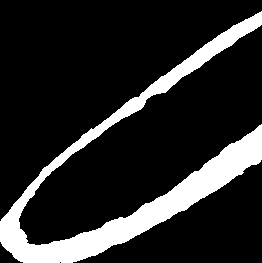


침식 연산 결과


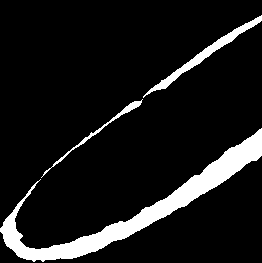


닫기 연산 결과 = 팽창 + 침식


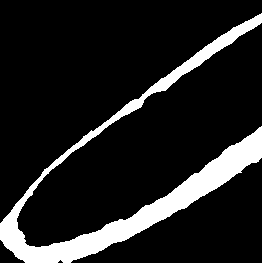


열기 연산 결과 = 침식 + 팽창


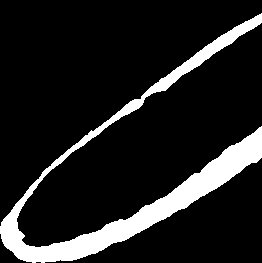

In [16]:
'''
opencv 팽창, 침식, 닫기, 열기 연산 적용
'''
cropBinImg=binImg[binImg.shape[0]//2:binImg.shape[0],0:binImg.shape[0]//2]
cv2_imshow(cropBinImg)

kernel=np.uint8([[0,0,1,0,0],			# 구조 요소
                [0,1,1,1,0],
                [1,1,1,1,1],
                [0,1,1,1,0],
                [0,0,1,0,0]])

print()
print('팽창 연산 결과')
b_dilation=cv2.dilate(cropBinImg,kernel,iterations=1)	# 팽창
cv2_imshow(b_dilation)

print()
print('침식 연산 결과')
b_erosion=cv2.erode(cropBinImg,kernel,iterations=1)	# 침식
cv2_imshow(b_erosion)

print()
print('닫기 연산 결과 = 팽창 + 침식')
b_closing=cv2.erode(cv2.dilate(cropBinImg,kernel,iterations=1),kernel,iterations=1)	# 닫기
cv2_imshow(b_closing)

print()
print('열기 연산 결과 = 침식 + 팽창')
b_closing=cv2.dilate(cv2.erode(cropBinImg,kernel,iterations=1),kernel,iterations=1)	# 열기
cv2_imshow(b_closing)